In [1435]:
#1(a)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load bull-bear spread data
spread = pd.read_excel("bull_bear_spread.xlsx", index_col=0, parse_dates=True)
spread=spread.head(1856)
spread

,Close
Date,
1987-07-24 00:00:00,0.220000
1987-07-31 00:00:00,0.000000
1987-08-07 00:00:00,0.270000
1987-08-14 00:00:00,0.250000
1987-08-21 00:00:00,0.600000
...,...
2023-01-26 00:00:00,-0.083094
2023-02-02 00:00:00,-0.046512
2023-02-09 00:00:00,0.125000


In [1436]:
spread=spread.dropna()
spread

,Close
Date,
1987-07-24 00:00:00,0.220000
1987-07-31 00:00:00,0.000000
1987-08-07 00:00:00,0.270000
1987-08-14 00:00:00,0.250000
1987-08-21 00:00:00,0.600000
...,...
2023-01-26 00:00:00,-0.083094
2023-02-02 00:00:00,-0.046512
2023-02-09 00:00:00,0.125000


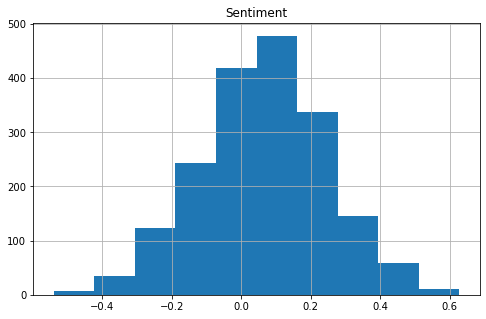

In [1437]:
plt.figure(figsize = (8, 5))
plt.title("Sentiment")
plt.hist(spread.Close)
plt.grid()

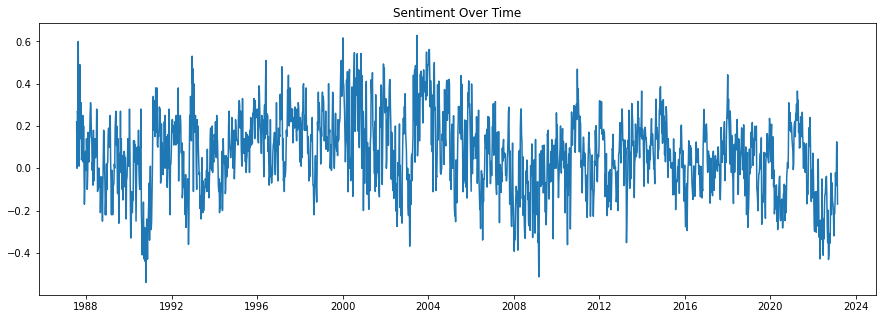

In [1476]:
plt.figure(figsize = (15, 5))
plt.title("Sentiment Over Time")
plt.plot(spread.Close)
plt.show()

In [1439]:
spread.describe()

,Close
count,1855.000000
mean,0.065736
std,0.181286
min,-0.540000
25%,-0.055760
50%,0.071130
75%,0.190000
max,0.628600


In the strategy, I calculate the 20-week moving average, and use it to identify unusually high or low levels of optimism in the index. When the indicator is more than 1.5 standard deviation above the 20-week moving average, we go short. When it is below the 20-week moving average, we go long. 

In [1440]:
w=20

# Calculate the 20-week moving average and standard deviation
spread['MA'] = spread['Close'].rolling(window=w).mean()
spread['STD'] = spread['Close'].rolling(window=w).std()

# Identify trading signals based on sentiment
sentiment_signal = pd.Series(np.zeros(len(spread)), index=spread.index)
sentiment_signal[spread["Close"] > (spread['MA'] + 1.5*spread['STD'])] = -1  # High optimism, go short
sentiment_signal[spread["Close"] < (spread['MA'] - 0*spread['STD'])] = 1  # High pessimism, go long
sentiment_signal

Date
1987-07-24 00:00:00    0.0
1987-07-31 00:00:00    0.0
1987-08-07 00:00:00    0.0
1987-08-14 00:00:00    0.0
1987-08-21 00:00:00    0.0
                      ... 
2023-01-26 00:00:00    0.0
2023-02-02 00:00:00    0.0
2023-02-09 00:00:00   -1.0
2023-02-16 00:00:00   -1.0
2023-02-23 00:00:00    1.0
Length: 1855, dtype: float64

In [1441]:
import yfinance as yf
sp500 = yf.download("^GSPC")[['Adj Close']]

[*********************100%***********************]  1 of 1 completed


In [1444]:
sp5002 = yf.download("^GSPC")[['Adj Close']]

[*********************100%***********************]  1 of 1 completed


In [1445]:
spread.index = pd.to_datetime(spread.index).tz_localize('America/New_York')

In [1446]:
sentiment_signal.index = pd.to_datetime(sentiment_signal.index).tz_localize('America/New_York')

In [1447]:
import warnings
warnings.filterwarnings('ignore')

In [1448]:
spread['sp500']=sp5002
spread

,Close,MA,STD,sp500
Date,,,,
1987-07-24 00:00:00-04:00,0.220000,NaN,NaN,309.269989
1987-07-31 00:00:00-04:00,0.000000,NaN,NaN,318.660004
1987-08-07 00:00:00-04:00,0.270000,NaN,NaN,323.000000
1987-08-14 00:00:00-04:00,0.250000,NaN,NaN,333.989990
1987-08-21 00:00:00-04:00,0.600000,NaN,NaN,335.899994
...,...,...,...,...
2023-01-26 00:00:00-05:00,-0.083094,-0.209820,0.119414,4060.429932
2023-02-02 00:00:00-05:00,-0.046512,-0.202215,0.124883,4179.759766
2023-02-09 00:00:00-05:00,0.125000,-0.174393,0.132856,4081.500000


In [1449]:
spread["ret"] = np.log(spread["sp500"]).diff()
spread

,Close,MA,STD,sp500,ret
Date,,,,,
1987-07-24 00:00:00-04:00,0.220000,NaN,NaN,309.269989,NaN
1987-07-31 00:00:00-04:00,0.000000,NaN,NaN,318.660004,0.029910
1987-08-07 00:00:00-04:00,0.270000,NaN,NaN,323.000000,0.013528
1987-08-14 00:00:00-04:00,0.250000,NaN,NaN,333.989990,0.033459
1987-08-21 00:00:00-04:00,0.600000,NaN,NaN,335.899994,0.005702
...,...,...,...,...,...
2023-01-26 00:00:00-05:00,-0.083094,-0.209820,0.119414,4060.429932,0.040607
2023-02-02 00:00:00-05:00,-0.046512,-0.202215,0.124883,4179.759766,0.028965
2023-02-09 00:00:00-05:00,0.125000,-0.174393,0.132856,4081.500000,-0.023789


In [1450]:
spread['signal']=sentiment_signal
spread

,Close,MA,STD,sp500,ret,signal
Date,,,,,,
1987-07-24 00:00:00-04:00,0.220000,NaN,NaN,309.269989,NaN,0.0
1987-07-31 00:00:00-04:00,0.000000,NaN,NaN,318.660004,0.029910,0.0
1987-08-07 00:00:00-04:00,0.270000,NaN,NaN,323.000000,0.013528,0.0
1987-08-14 00:00:00-04:00,0.250000,NaN,NaN,333.989990,0.033459,0.0
1987-08-21 00:00:00-04:00,0.600000,NaN,NaN,335.899994,0.005702,0.0
...,...,...,...,...,...,...
2023-01-26 00:00:00-05:00,-0.083094,-0.209820,0.119414,4060.429932,0.040607,0.0
2023-02-02 00:00:00-05:00,-0.046512,-0.202215,0.124883,4179.759766,0.028965,0.0
2023-02-09 00:00:00-05:00,0.125000,-0.174393,0.132856,4081.500000,-0.023789,-1.0


In [1453]:
spread['cumulative_returns']=np.exp((spread["signal"].shift()*spread.ret).cumsum())-1

In [1454]:
spread["strat_returns"] = spread["signal"].shift()*(spread["sp500"].pct_change())
spread

,Close,MA,STD,sp500,ret,signal,cumulative_returns,strat_returns
Date,,,,,,,,
1987-07-24 00:00:00-04:00,0.220000,NaN,NaN,309.269989,NaN,0.0,NaN,NaN
1987-07-31 00:00:00-04:00,0.000000,NaN,NaN,318.660004,0.029910,0.0,0.000000,0.000000
1987-08-07 00:00:00-04:00,0.270000,NaN,NaN,323.000000,0.013528,0.0,0.000000,0.000000
1987-08-14 00:00:00-04:00,0.250000,NaN,NaN,333.989990,0.033459,0.0,0.000000,0.000000
1987-08-21 00:00:00-04:00,0.600000,NaN,NaN,335.899994,0.005702,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2023-01-26 00:00:00-05:00,-0.083094,-0.209820,0.119414,4060.429932,0.040607,0.0,1.969420,-0.041443
2023-02-02 00:00:00-05:00,-0.046512,-0.202215,0.124883,4179.759766,0.028965,0.0,1.969420,0.000000
2023-02-09 00:00:00-05:00,0.125000,-0.174393,0.132856,4081.500000,-0.023789,-1.0,1.969420,-0.000000


In [1455]:
spread["success"] = ((spread[spread.signal != 0]["cumulative_returns"].diff()>0)*1).shift(-1)
spread

,Close,MA,STD,sp500,ret,signal,cumulative_returns,strat_returns,success
Date,,,,,,,,,
1987-07-24 00:00:00-04:00,0.220000,NaN,NaN,309.269989,NaN,0.0,NaN,NaN,NaN
1987-07-31 00:00:00-04:00,0.000000,NaN,NaN,318.660004,0.029910,0.0,0.000000,0.000000,NaN
1987-08-07 00:00:00-04:00,0.270000,NaN,NaN,323.000000,0.013528,0.0,0.000000,0.000000,NaN
1987-08-14 00:00:00-04:00,0.250000,NaN,NaN,333.989990,0.033459,0.0,0.000000,0.000000,NaN
1987-08-21 00:00:00-04:00,0.600000,NaN,NaN,335.899994,0.005702,0.0,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
2023-01-26 00:00:00-05:00,-0.083094,-0.209820,0.119414,4060.429932,0.040607,0.0,1.969420,-0.041443,NaN
2023-02-02 00:00:00-05:00,-0.046512,-0.202215,0.124883,4179.759766,0.028965,0.0,1.969420,0.000000,NaN
2023-02-09 00:00:00-05:00,0.125000,-0.174393,0.132856,4081.500000,-0.023789,-1.0,1.969420,-0.000000,0.0


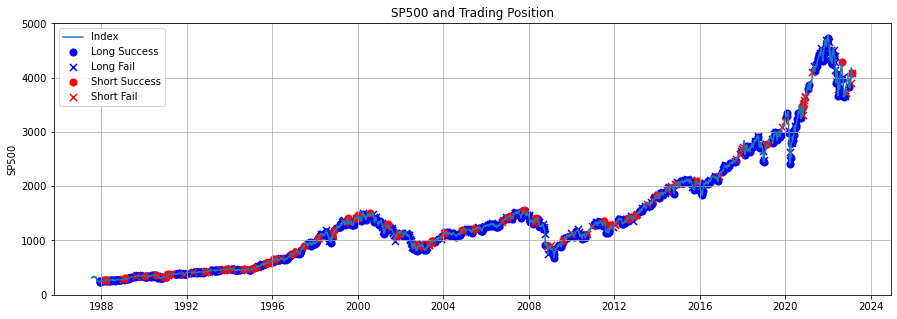

In [1456]:
plt.figure(figsize = (15, 5))

plt.title("SP500 and Trading Position")
plt.ylabel("SP500")
plt.plot(spread['sp500'])

longsuccess = spread[(spread["success"] == 1) & (spread["signal"] == 1)]
longfail = spread[(spread["success"] == 0) & (spread["signal"] == 1)] 
shortsuccess = spread[(spread["success"] == 1) & (spread["signal"] == -1)]
shortfail = spread[(spread["success"] == 0) & (spread["signal"] == -1)]

plt.scatter(longsuccess.index, longsuccess["sp500"], color = 'blue', s = 50)
plt.scatter(longfail.index, longfail["sp500"], color = 'blue', s = 50, marker = "x")

plt.scatter(shortsuccess.index, shortsuccess["sp500"], color = 'red', s = 50)
plt.scatter(shortfail.index, shortfail["sp500"], color = 'red', s = 50, marker = "x")

plt.legend(["Index", "Long Success", "Long Fail", "Short Success", "Short Fail"])
#plt.xlim([datetime.date(2022, 1, 1), datetime.date(2023, 1, 1)])
plt.grid()

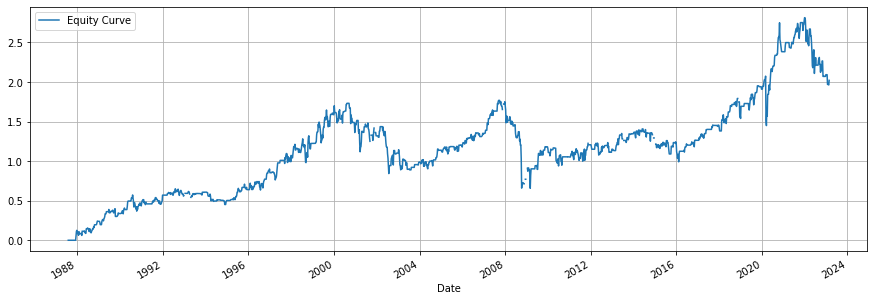

In [1457]:
#1.(b)
plt.figure(figsize = (15, 5))
(spread["cumulative_returns"]).plot()

plt.legend(["Equity Curve"])

plt.grid()
#plt.xlim(["1/1/2019", "1/1/2022"])

In [1458]:
# Calculate performance metrics
total_return = spread['cumulative_returns'][-1]*100
total_return

202.061868553473

In [1459]:
annualized=(((spread['cumulative_returns'][-1]+1)**(1/(len(spread)/52)))-1)*100
annualized

3.1473830653140134

In [1460]:
position_days = (spread['signal'] != 0).sum()
position_return=(((spread['cumulative_returns'][-1]+1)**(1/(position_days/52)))-1)*100
position_return

5.56736383720533

In [1461]:
rf_rate = pd.read_csv("1-year-treasury-rate-yield-chart.csv", index_col = 0, parse_dates = True).dropna()

In [1462]:
rf_rate = (rf_rate/100+1)**(1/52)-1

In [1463]:
rf_rate.index = pd.to_datetime(rf_rate.index).tz_localize('America/New_York')

In [1464]:
spread["rf"] = rf_rate
spread["rf"] = spread["rf"].ffill()
spread

,Close,MA,STD,sp500,ret,signal,cumulative_returns,strat_returns,success,rf
Date,,,,,,,,,,
1987-07-24 00:00:00-04:00,0.220000,NaN,NaN,309.269989,NaN,0.0,NaN,NaN,NaN,0.001270
1987-07-31 00:00:00-04:00,0.000000,NaN,NaN,318.660004,0.029910,0.0,0.000000,0.000000,NaN,0.001282
1987-08-07 00:00:00-04:00,0.270000,NaN,NaN,323.000000,0.013528,0.0,0.000000,0.000000,NaN,0.001297
1987-08-14 00:00:00-04:00,0.250000,NaN,NaN,333.989990,0.033459,0.0,0.000000,0.000000,NaN,0.001286
1987-08-21 00:00:00-04:00,0.600000,NaN,NaN,335.899994,0.005702,0.0,0.000000,0.000000,NaN,0.001309
...,...,...,...,...,...,...,...,...,...,...
2023-01-26 00:00:00-05:00,-0.083094,-0.209820,0.119414,4060.429932,0.040607,0.0,1.969420,-0.041443,NaN,0.000873
2023-02-02 00:00:00-05:00,-0.046512,-0.202215,0.124883,4179.759766,0.028965,0.0,1.969420,0.000000,NaN,0.000873
2023-02-09 00:00:00-05:00,0.125000,-0.174393,0.132856,4081.500000,-0.023789,-1.0,1.969420,-0.000000,0.0,0.000873


In [1465]:
spreadY = (spread+1).resample('Y').prod()-1
spreadY

,Close,MA,STD,sp500,ret,signal,cumulative_returns,strat_returns,success,rf
Date,,,,,,,,,,
1987-12-31 00:00:00-05:00,20.195333,1.086283,1.310693,6.898838e+58,-0.220446,31.0,4.522972e-01,0.103430,7.0,0.032920
1988-12-31 00:00:00-05:00,0.960965,8.173964,401.966050,5.538346e+123,0.067360,-1.0,5.762159e+02,0.119890,262143.0,0.076637
1989-12-31 00:00:00-05:00,1.657708,1.402310,729.872856,3.401780e+130,0.260106,-1.0,1.509019e+06,0.077750,524287.0,0.085145
1990-12-31 00:00:00-05:00,-0.999830,-0.991058,2498.284930,1.957533e+131,-0.081106,-1.0,1.386561e+08,0.071200,2097151.0,0.078604
1991-12-31 00:00:00-05:00,48.409586,2.149977,1440.847387,2.384718e+131,0.199623,-1.0,3.933831e+08,0.092156,32767.0,0.058453
1992-12-31 00:00:00-05:00,30.099404,23.393006,690.504136,3.908146e+133,0.065543,-1.0,1.371497e+10,0.006501,8191.0,0.038836
1993-12-31 00:00:00-05:00,0.197572,2.645511,1618.287181,2.689414e+135,0.070935,-1.0,7.494907e+09,0.071041,4095.0,0.035005
1994-12-31 00:00:00-05:00,4.425644,3.708320,186.251278,3.323592e+138,-0.021129,-1.0,2.622517e+09,-0.065309,8191.0,0.053225
1995-12-31 00:00:00-05:00,2349.686578,913.669006,80.597590,1.369949e+142,0.326706,-1.0,2.549973e+10,0.089232,131071.0,0.059373


In [1466]:
spreadY['excess'] = spreadY['strat_returns']-spreadY['rf']

In [1467]:
annualized_w = (spreadY['excess']+1).prod()**(1/len(spreadY))-1

In [1468]:
std_w = spreadY['excess'].std()

In [1469]:
sharpe=annualized_w/std_w
sharpe

0.008238841122722133

In [1470]:
def GINI_COEF(returns):
    # get the number of periods -> will allow us to calculate the areas
    periods = len(returns)
    
    # sort values and sum to calculate the lorenz curve
    LorenzCurve = np.cumsum(returns.sort_values( by = "Returns"))
    # start from 0
    LorenzCurve = pd.DataFrame({ 'Returns': [0]}).append(LorenzCurve)
    Line = LorenzCurve.copy()
    # Form the line that encompasses A and B
    Line["Returns"] = np.arange(0,1+1/periods, 1/periods)*max(LorenzCurve["Returns"])
    
    # calculate the area of A+B
    UpArea = 0
    for i in range(1,len(returns)):
        UpArea = UpArea + ((Line.iloc[i,:] - LorenzCurve.iloc[i,:] + Line.iloc[i-1,:] - LorenzCurve.iloc[i-1,:]) / 2)
    # calculate the area of A+B+C
    if min(LorenzCurve["Returns"]) < 0:
        AllArea = (np.abs(min(LorenzCurve["Returns"])) * periods) + ((max(LorenzCurve["Returns"]) * periods)/2)
    else:
        AllArea = ((max(LorenzCurve["Returns"]) * periods)/2)
    gini = UpArea / AllArea
    return(gini[0])

In [1471]:
returns = spread[['strat_returns']]
returns.columns = ['Returns']

In [1472]:
gini=GINI_COEF(returns)
gini

0.8465860384104057

In [1475]:
print(f'Total Rate of Return: {total_return:.4f}','%')
print(f'Annualized Return: {annualized:.4f}','%')
print(f'Rate of return only over the days we hold a position: {position_return:.4f}','%')
print(f'Sharpe Ratio: {sharpe:.4f}')
print(f'Gini Coefficient: {gini:.4f}')

Total Rate of Return: 202.0619 %
Annualized Return: 3.1474 %
Rate of return only over the days we hold a position: 5.5674 %
Sharpe Ratio: 0.0082
Gini Coefficient: 0.8466


2.(a) Silicon Valley Bank, the 16th largest bank in the United States, collapsed on 3/10/2023 after a run on deposits that doomed the bank's plans to raise fresh capital. The Federal Deposit Insurance Corp has taken control of the bank and created a new entity called the Deposit Insurance National Bank of Santa Clara. The bank's deposits have been transferred to the new bank, with insured depositors having access to their funds by Monday morning. 

(b)EURUSD: The collapse of a major US bank could lead to increased uncertainty and risk aversion, which may lead investors to flock to safe-haven currencies like the US dollar. This could potentially result in an increase in the value of the dollar relative to the euro, leading to a decrease in the EURUSD exchange rate.

Ten Year US interest rates: The collapse of a bank could lead to a flight to safety, as investors seek the security of US Treasury bonds. This could lead to an increase in demand for these bonds, causing their prices to rise and their yields (interest rates) to fall. However, if investors believe that the collapse of Silicon Valley Bank could have a negative impact on the overall economy, they may demand higher yields to compensate for the increased risk, leading to an increase in interest rates.

SP500: The collapse of a bank can have a negative impact on the broader financial sector and the overall economy, which could potentially lead to a decrease in stock prices, including the SP500. 

(c)3/9:EURUSD: EURUSD + 0.34%.

Ten Year US interest rates: -0.05%

SP500: -1.8%.

3/10:EURUSD: EURUSD + 0.60%.

Ten Year US interest rates: -0.23%

SP500: -1.4%

(d) EURUSD increased on 3/9 and 3/10. But Ten Year US interest rates and SP500 decreased on 3/9 and 3/10. 

The news on 3/10 reported that the US economy added 311,000 jobs in February, which is a positive indicator of the economy's strength. However, it also mentioned that the unemployment rate rose slightly to 3.6% in February from January's 3.4%, which may have contributed to a decrease in investor confidence. In addition, the collapse of Silicon Valley Bank could have caused concerns among investors and led to a flight to safety. This flight to safety may have resulted in a decrease in demand for riskier assets such as equities, which could explain the decline in the SP500.

The decrease in the US ten-year interest rates may be attributed to concerns about inflation. The news reported that inflation had firmed up, which could have raised concerns about a potential increase in interest rates by the Federal Reserve to control inflation. This expectation of higher interest rates may have led to a decrease in demand for US bonds, which could explain the decrease in the US ten-year interest rates.

In terms of the increase in the EURUSD, the decrease in the US ten-year interest rates may have made the US dollar less attractive to investors. Additionally, the concerns about the SP500 and the collapse of Silicon Valley Bank may have led to a flight to safety and an increase in demand for the euro.